In [11]:
pip install geopandas xarray netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 9.2 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 10.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [46]:
import geopandas as gpd
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import netCDF4

In [47]:
# Make sure the path to the shapefile is correct
shapefile_path = 'BRA_adm1.shp'
gdf_brazil = gpd.read_file(shapefile_path)

<Axes: >

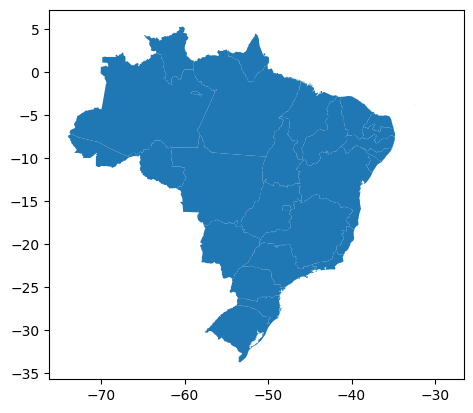

In [68]:
gdf_brazil.plot()

In [70]:
gdf_brazil

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,33,BRA,Brazil,1,Acre,BR.AC,0,None,Estado,State,None,None,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350..."
1,33,BRA,Brazil,2,Alagoas,BR.AL,0,None,Estado,State,None,None,"MULTIPOLYGON (((-35.90153 -9.86180, -35.90153 ..."
2,33,BRA,Brazil,3,Amapá,BR.AP,0,None,Estado,State,None,None,"MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0..."
3,33,BRA,Brazil,4,Amazonas,BR.AM,0,None,Estado,State,None,Amazone,"POLYGON ((-67.32623 2.02968, -67.30118 1.92997..."
4,33,BRA,Brazil,5,Bahia,BR.BA,0,None,Estado,State,None,Ba¡a,"MULTIPOLYGON (((-38.69708 -17.97903, -38.69708..."
5,33,BRA,Brazil,6,Ceará,BR.CE,0,None,Estado,State,None,None,"MULTIPOLYGON (((-38.47542 -3.70097, -38.47542 ..."
6,33,BRA,Brazil,7,Distrito Federal,BR.DF,0,None,Distrito Federal,Federal District,None,None,"POLYGON ((-48.03603 -15.50022, -47.77200 -15.5..."
7,33,BRA,Brazil,8,Espírito Santo,BR.ES,0,None,Estado,State,None,Espiritu Santo,"MULTIPOLYGON (((-40.88403 -21.16125, -40.88403..."
8,33,BRA,Brazil,9,Goiás,BR.GO,0,None,Estado,State,None,Goiáz|Goyáz,"POLYGON ((-50.15817 -12.41238, -50.15942 -12.4..."
9,33,BRA,Brazil,10,Maranhão,BR.MA,0,None,Estado,State,None,São Luíz de Maranhão,"MULTIPOLYGON (((-42.12375 -2.80069, -42.12375 ..."


In [69]:
# Make sure the path to the NetCDF file is correct
netcdf_path = 'precip.mon.total.v7.nc'
ds = xr.open_dataset(netcdf_path)
ds

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 1356)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 1901-01-01 1901-02-01 ... 2013-12-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Original_Source:  http://www.dwd.de/en/FundE/Klima/KLIS/int/GPCC/GPCC.htm...
    Reference:        Users of the data sets are kindly requested to give fee...
    original_source:  ftp://ftp-anon.dwd.de/pub/data/gpcc/html/fulldata_downl...
    Conventions:      CF 1.0
    history:          Created 01/2016 based on V7 data obtained via ftp
    title:            GPCC Full Data Reanalysis Version 7 0.5x0.5 Monthly Total
    dataset_title:    Global Precipitation Climatology Centre (GPCC)
    References:       http://www.psl.noaa.gov/data/gridded/data.gpcc.html

In [49]:
ds['precip'].mean()

<xarray.DataArray 'precip' ()>
array(60.810177, dtype=float32)

In [50]:
ds.groupby('time.year').mean(dim='time')

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, year: 113)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * year     (year) int64 1901 1902 1903 1904 1905 ... 2009 2010 2011 2012 2013
Data variables:
    precip   (year, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Original_Source:  http://www.dwd.de/en/FundE/Klima/KLIS/int/GPCC/GPCC.htm...
    Reference:        Users of the data sets are kindly requested to give fee...
    original_source:  ftp://ftp-anon.dwd.de/pub/data/gpcc/html/fulldata_downl...
    Conventions:      CF 1.0
    history:          Created 01/2016 based on V7 data obtained via ftp
    title:            GPCC Full Data Reanalysis Version 7 0.5x0.5 Monthly Total
    dataset_title:    Global Precipitation Climatology Centre (GPCC)
    References:       http://www.psl.noaa.gov/data/gridded/data.gpcc.html

In [51]:
precip_mean = ds['precip'].mean(dim='time')

In [52]:
precip_mean.mean()

<xarray.DataArray 'precip' ()>
array(60.810257, dtype=float32)

In [53]:
str(precip_mean)

"<xarray.DataArray 'precip' (lat: 360, lon: 720)>\narray([[nan, nan, nan, ..., nan, nan, nan],\n       [nan, nan, nan, ..., nan, nan, nan],\n       [nan, nan, nan, ..., nan, nan, nan],\n       ...,\n       [nan, nan, nan, ..., nan, nan, nan],\n       [nan, nan, nan, ..., nan, nan, nan],\n       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)\nCoordinates:\n  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75\n  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8"

In [54]:
# Aggregate the data by taking the mean across the 'time' dimension
precip_mean = ds['precip'].mean(dim='time')

# Flatten the data
precip_flat = precip_mean.values.flatten()
lats = ds['lat'].values
lons = ds['lon'].values
lat_expanded = np.repeat(lats, len(lons))
lon_expanded = np.tile(lons, len(lats))

# Create a DataFrame
df_precip = pd.DataFrame({
    'Latitude': lat_expanded,
    'Longitude': lon_expanded,
    'Precipitation': precip_flat
})


In [55]:
df_precip

,Latitude,Longitude,Precipitation
0,89.75,0.25,NaN
1,89.75,0.75,NaN
2,89.75,1.25,NaN
3,89.75,1.75,NaN
4,89.75,2.25,NaN
...,...,...,...
259195,-89.75,357.75,NaN
259196,-89.75,358.25,NaN
259197,-89.75,358.75,NaN
259198,-89.75,359.25,NaN


In [72]:
df_precip['Precipitation'].dropna()

6240       10.418028
9279       14.262805
9280       14.322522
9281       14.381590
9282       14.489535
             ...    
213787    119.670403
214506    116.647354
214507    116.948906
215225    110.870461
215226    113.317062
Name: Precipitation, Length: 69736, dtype: float32

In [73]:
# Convert the DataFrame to a GeoDataFrame
gdf_precip = gpd.GeoDataFrame(df_precip, geometry=gpd.points_from_xy(df_precip.Longitude, df_precip.Latitude))
gdf_precip.set_crs(epsg=4326, inplace=True)


,Latitude,Longitude,Precipitation,geometry
0,89.75,0.25,NaN,POINT (0.25000 89.75000)
1,89.75,0.75,NaN,POINT (0.75000 89.75000)
2,89.75,1.25,NaN,POINT (1.25000 89.75000)
3,89.75,1.75,NaN,POINT (1.75000 89.75000)
4,89.75,2.25,NaN,POINT (2.25000 89.75000)
...,...,...,...,...
259195,-89.75,357.75,NaN,POINT (357.75000 -89.75000)
259196,-89.75,358.25,NaN,POINT (358.25000 -89.75000)
259197,-89.75,358.75,NaN,POINT (358.75000 -89.75000)
259198,-89.75,359.25,NaN,POINT (359.25000 -89.75000)


In [75]:
gdf_precip['Precipitation'].dropna()

6240       10.418028
9279       14.262805
9280       14.322522
9281       14.381590
9282       14.489535
             ...    
213787    119.670403
214506    116.647354
214507    116.948906
215225    110.870461
215226    113.317062
Name: Precipitation, Length: 69736, dtype: float32

In [76]:
gdf_precip

,Latitude,Longitude,Precipitation,geometry
0,89.75,0.25,NaN,POINT (0.25000 89.75000)
1,89.75,0.75,NaN,POINT (0.75000 89.75000)
2,89.75,1.25,NaN,POINT (1.25000 89.75000)
3,89.75,1.75,NaN,POINT (1.75000 89.75000)
4,89.75,2.25,NaN,POINT (2.25000 89.75000)
...,...,...,...,...
259195,-89.75,357.75,NaN,POINT (357.75000 -89.75000)
259196,-89.75,358.25,NaN,POINT (358.25000 -89.75000)
259197,-89.75,358.75,NaN,POINT (358.75000 -89.75000)
259198,-89.75,359.25,NaN,POINT (359.25000 -89.75000)


In [77]:
gdf_joined = gpd.sjoin(gdf_precip, gdf_brazil, how="inner", predicate='intersects')

In [80]:
gdf_precip.head()

,Latitude,Longitude,Precipitation,geometry
0,89.75,0.25,NaN,POINT (0.25000 89.75000)
1,89.75,0.75,NaN,POINT (0.75000 89.75000)
2,89.75,1.25,NaN,POINT (1.25000 89.75000)
3,89.75,1.75,NaN,POINT (1.75000 89.75000)
4,89.75,2.25,NaN,POINT (2.25000 89.75000)


In [89]:
gdf_brazil.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,33,BRA,Brazil,1,Acre,BR.AC,0,None,Estado,State,None,None,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350..."
1,33,BRA,Brazil,2,Alagoas,BR.AL,0,None,Estado,State,None,None,"MULTIPOLYGON (((-35.90153 -9.86180, -35.90153 ..."
2,33,BRA,Brazil,3,Amapá,BR.AP,0,None,Estado,State,None,None,"MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0..."
3,33,BRA,Brazil,4,Amazonas,BR.AM,0,None,Estado,State,None,Amazone,"POLYGON ((-67.32623 2.02968, -67.30118 1.92997..."
4,33,BRA,Brazil,5,Bahia,BR.BA,0,None,Estado,State,None,Ba¡a,"MULTIPOLYGON (((-38.69708 -17.97903, -38.69708..."


In [98]:
gdf_brazil['geometry']

0     POLYGON ((-73.33251 -7.32488, -73.27482 -7.350...
1     MULTIPOLYGON (((-35.90153 -9.86180, -35.90153 ...
2     MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0...
3     POLYGON ((-67.32623 2.02968, -67.30118 1.92997...
4     MULTIPOLYGON (((-38.69708 -17.97903, -38.69708...
5     MULTIPOLYGON (((-38.47542 -3.70097, -38.47542 ...
6     POLYGON ((-48.03603 -15.50022, -47.77200 -15.5...
7     MULTIPOLYGON (((-40.88403 -21.16125, -40.88403...
8     POLYGON ((-50.15817 -12.41238, -50.15942 -12.4...
9     MULTIPOLYGON (((-42.12375 -2.80069, -42.12375 ...
10    POLYGON ((-56.10364 -17.17354, -56.08440 -17.1...
11    POLYGON ((-57.60524 -8.66285, -57.59355 -8.707...
12    POLYGON ((-44.20978 -14.23665, -44.20908 -14.2...
13    MULTIPOLYGON (((-46.43458 -1.01708, -46.43458 ...
14    MULTIPOLYGON (((-42.87874 -9.29837, -42.86221 ...
15    MULTIPOLYGON (((-48.63070 -25.86792, -48.63070...
16    MULTIPOLYGON (((-35.13597 -8.83792, -35.13597 ...
17    POLYGON ((-41.81681 -2.74375, -41.81681 -2

In [101]:
from shapely.geometry import Point, Polygon

# Create Point objects
p1 = Point(24.952242, 60.1696017)

for idx, row in gdf_precip.iterrows():
    if not pd.isnull(row['Precipitation']):
        p1= Point(row['Latitude'],row['Longitude'])
        # print(p1)
        if p1.within(gdf_brazil['geometry'].any()):
            print('found')
            die()
        # for idx, state in gdf_brazil.iterrows():
        #     # print(state)
        #     if p1.within(state.geometry):
        #         print('foiun')
        #         die()

            
        # if row in gdf_brazil:
        #     print('fou')
        #     die()
        # # print(row)
        # die()

In [79]:
gdf_joined

,Latitude,Longitude,Precipitation,geometry,index_right,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1


In [78]:
gdf_brazil

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,33,BRA,Brazil,1,Acre,BR.AC,0,None,Estado,State,None,None,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350..."
1,33,BRA,Brazil,2,Alagoas,BR.AL,0,None,Estado,State,None,None,"MULTIPOLYGON (((-35.90153 -9.86180, -35.90153 ..."
2,33,BRA,Brazil,3,Amapá,BR.AP,0,None,Estado,State,None,None,"MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0..."
3,33,BRA,Brazil,4,Amazonas,BR.AM,0,None,Estado,State,None,Amazone,"POLYGON ((-67.32623 2.02968, -67.30118 1.92997..."
4,33,BRA,Brazil,5,Bahia,BR.BA,0,None,Estado,State,None,Ba¡a,"MULTIPOLYGON (((-38.69708 -17.97903, -38.69708..."
5,33,BRA,Brazil,6,Ceará,BR.CE,0,None,Estado,State,None,None,"MULTIPOLYGON (((-38.47542 -3.70097, -38.47542 ..."
6,33,BRA,Brazil,7,Distrito Federal,BR.DF,0,None,Distrito Federal,Federal District,None,None,"POLYGON ((-48.03603 -15.50022, -47.77200 -15.5..."
7,33,BRA,Brazil,8,Espírito Santo,BR.ES,0,None,Estado,State,None,Espiritu Santo,"MULTIPOLYGON (((-40.88403 -21.16125, -40.88403..."
8,33,BRA,Brazil,9,Goiás,BR.GO,0,None,Estado,State,None,Goiáz|Goyáz,"POLYGON ((-50.15817 -12.41238, -50.15942 -12.4..."
9,33,BRA,Brazil,10,Maranhão,BR.MA,0,None,Estado,State,None,São Luíz de Maranhão,"MULTIPOLYGON (((-42.12375 -2.80069, -42.12375 ..."


In [66]:
gdf_joined

,Latitude,Longitude,Precipitation,geometry,index_right,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1


In [81]:
# Replace 'NAME_1' with the actual name of the column containing state names in your shapefile
precip_by_state = gdf_joined.groupby('NAME_1')['Precipitation'].mean().reset_index()


In [82]:
precip_by_state

,NAME_1,Precipitation


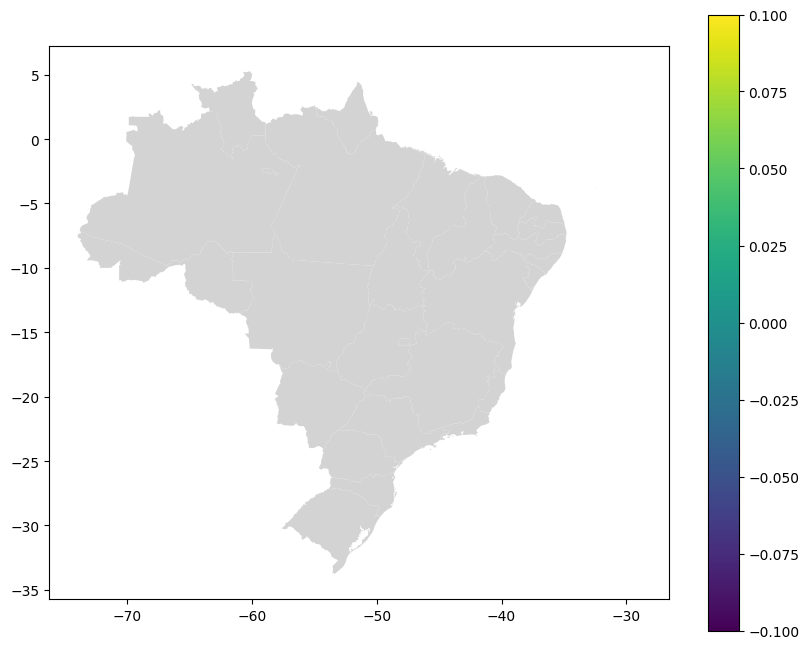

In [36]:
# Merge the results back with the Brazil GeoDataFrame to get geometries for plotting
gdf_brazil = gdf_brazil.merge(precip_by_state, left_on='NAME_1', right_on='NAME_1', how='left')

# Plot the Brazil map with mean precipitation by state
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_brazil.plot(column='Precipitation', ax=ax, legend=True, missing_kwds={'color': 'lightgrey'})
plt.show()

In [37]:
# Assuming 'Precipitation' is the column with your precipitation data
min_precip = gdf_brazil['Precipitation'].min()
max_precip = gdf_brazil['Precipitation'].max()

print(f"Minimum Precipitation: {min_precip}")
print(f"Maximum Precipitation: {max_precip}")


Minimum Precipitation: nan
Maximum Precipitation: nan


In [34]:
gdf_brazil['Precipitation'] = gdf_brazil['Precipitation'].fillna(0)

min_precip = gdf_brazil['Precipitation'].min()
max_precip = gdf_brazil['Precipitation'].max()

print(f"Minimum Precipitation: {min_precip}")
print(f"Maximum Precipitation: {max_precip}")


Minimum Precipitation: 0.0
Maximum Precipitation: 0.0


In [20]:
print(gdf_brazil['NAME_1'].head())
print(precip_by_state['NAME_1'].head())  


0        Acre
1     Alagoas
2       Amapá
3    Amazonas
4       Bahia
Name: NAME_1, dtype: object
Series([], Name: NAME_1, dtype: object)
